<a href="https://colab.research.google.com/github/amymailo/fake_news_detection_using_python/blob/main/CSC_681_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load libraries
import os
import tensorflow as tf

from tensorflow import keras
import keras.layers as layers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')

import pandas as pd
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import io
from tensorflow.keras.utils import get_file

import nltk
from nltk.corpus import stopwords
import string

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Upload politifact_real.csv
politifact_real = pd.read_csv('politifact_real.csv')
# Upload politifact_fake.csv
politifact_fake = pd.read_csv('politifact_fake.csv')
# Upload gossipcop_real.csv
gossipcop_real = pd.read_csv('gossipcop_real.csv')
# Upload gossipcop_fake.csv
gossipcop_fake = pd.read_csv('gossipcop_fake.csv')

In [ ]:
# Preview DataFrames
politifact_real.head()
politifact_fake.head()
gossipcop_real.head()
gossipcop_fake.head()

In [ ]:
# Glimpse data
politifact_real.info()
politifact_fake.info()
gossipcop_real.info()
gossipcop_fake.info()

In [6]:
#Combine real news data sets
real_news = pd.concat([politifact_real, gossipcop_real])
real_news

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...
...,...,...,...,...
16812,gossipcop-891749,https://omgcheckitout.com/2017-hollywood-film-...,2017 Hollywood Film Awards: The Complete List ...,927385466357260288\t927386601034010625\t927387...
16813,gossipcop-941486,https://pagesix.com/2018/06/04/jada-pinkett-sm...,Jada Pinkett Smith explains why son Jaden move...,1004044947006386178\t1004045964401889285\t1004...
16814,gossipcop-953143,https://www.etonline.com/tinsley-mortimer-reac...,Tinsley Mortimer Reacts to Luann de Lesseps' R...,1019924845889572864\t1019925702676709377\t1019...
16815,gossipcop-954366,https://www.healthbreakingnews.net/2018/07/pri...,Prince Harry Carries on Princess Diana’s Legac...,1021766291139584000\t1021772054599802880\t1021...


In [7]:
#Combine fake news data sets
fake_news = pd.concat([politifact_fake, gossipcop_fake])
fake_news

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...
...,...,...,...,...
5318,gossipcop-6702260693,www.huffingtonpost.com/2012/09/11/september-11...,September 11: Celebrities Remember 9/11 (TWEETS),245643768638894080
5319,gossipcop-6051845337,www.dailymail.co.uk/news/article-4915674/NASCA...,NASCAR owners threaten to fire drivers who pro...,912048333413330944\t912048571482087424\t912049...
5320,gossipcop-2435526162,www.telegraph.co.uk/men/the-filter/7-signs-dav...,The 7 signs that David Beckham is definitely h...,897794716447539200\t897804460830928896\t897842...
5321,gossipcop-4576152851,www.vanityfair.com/style/2016/09/ryan-gosling-...,Ryan Gosling and Eva Mendes Did Not Get Marrie...,778678901572710400\t778681718714740736\t778683...


In [8]:
# drop columns 'id', 'news_url', and 'tweet_ids' from real_news and fake_news dataframes
real_news.drop(['id', 'news_url', 'tweet_ids'], axis=1, inplace=True)
fake_news.drop(['id', 'news_url', 'tweet_ids'], axis=1, inplace=True)
#irrelevant columns: id, news_url, tweet_ids
#relevant columns: label, title

In [9]:
real_news['title']

0              National Federation of Independent Business
1                              comments in Fayetteville NC
2        Romney makes pitch, hoping to close deal : Ele...
3        Democratic Leaders Say House Democrats Are Uni...
4          Budget of the United States Government, FY 2008
                               ...                        
16812    2017 Hollywood Film Awards: The Complete List ...
16813    Jada Pinkett Smith explains why son Jaden move...
16814    Tinsley Mortimer Reacts to Luann de Lesseps' R...
16815    Prince Harry Carries on Princess Diana’s Legac...
16816    Kylie Jenner is actually terrified of butterflies
Name: title, Length: 17441, dtype: object

In [10]:
#PRE-PROCESS!
import pandas as pd
import nltk
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# drop duplicate rows
real_news.drop_duplicates(subset=['title'], inplace=True)
fake_news.drop_duplicates(subset=['title'], inplace=True)

# drop rows with missing values
real_news.dropna(inplace=True)
fake_news.dropna(inplace=True)

# convert text to lowercase
real_news['title'] = real_news['title'].str.lower()
fake_news['title'] = fake_news['title'].str.lower()

# remove punctuation
real_news['title'] = real_news['title'].apply(lambda x: re.sub('[^\w\s]', '', x))
fake_news['title'] = fake_news['title'].apply(lambda x: re.sub('[^\w\s]', '', x))

# tokenize text
real_news['tokens'] = real_news['title'].apply(lambda x: word_tokenize(x))
fake_news['tokens'] = fake_news['title'].apply(lambda x: word_tokenize(x))

# remove stopwords
stop_words = set(stopwords.words('english'))
real_news['tokens'] = real_news['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
fake_news['tokens'] = fake_news['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# perform lemmatization
lemmatizer = WordNetLemmatizer()
real_news['tokens'] = real_news['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
fake_news['tokens'] = fake_news['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
real_news['title']
#check that it worked- yes

0              national federation of independent business
1                              comments in fayetteville nc
2        romney makes pitch hoping to close deal  elect...
3        democratic leaders say house democrats are uni...
4           budget of the united states government fy 2008
                               ...                        
16812    2017 hollywood film awards the complete list o...
16813    jada pinkett smith explains why son jaden move...
16814    tinsley mortimer reacts to luann de lesseps re...
16815    prince harry carries on princess dianas legacy...
16816    kylie jenner is actually terrified of butterflies
Name: title, Length: 16524, dtype: object

In [12]:
# split real news into 3 different datasets
real_news_split = np.array_split(real_news, 3)

In [13]:
# rename 3 split datsets
rn1 = real_news_split[0]
rn2 = real_news_split[1]
rn3 = real_news_split[2]

# count
print("rn1 = ",len(rn1.index),"rn2 = ",len(rn2.index),"rn3 = ",len(rn3.index))
#now our real vs fake news datasets are much more balanced than before. Our previous code/models ran the
#caclulations with the imbalanced dataset. When we realized that the imbalanced dataset was impacting our
#results, we decided to come back and implement this code

rn1 =  5508 rn2 =  5508 rn3 =  5508


## TF-IDF

#### Group #1

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

fake_news['label'] = 0
rn1['label'] = 1

# concatenate fake & real news datasets
all_news_1 = pd.concat([fake_news, rn1], ignore_index=True)

# generate TF-IDF features by using 'title'

#group1
vectorizer = TfidfVectorizer()
X1 = vectorizer.fit_transform(all_news_1['title'])
y1 = all_news_1['label']


# get feature names from vocabulary_ attribute of vectorizer
feature_names = vectorizer.vocabulary_.keys()
# feature_names

# convert TF-IDF matrix to a NumPy array
#group1
X1_array = X1.toarray()


# create a Pandas DataFrame with feature names and their corresponding TF-IDF values

#group1
tfidf_df1 = pd.DataFrame(X1_array, columns=feature_names)

# print top 10 rows
print(tfidf_df1.head(10))

# get number of documents and unique features
num_docs, num_features = X1_array.shape
print("Number of documents:", num_docs)
print("Number of features:", num_features)

# get vocabulary dictionary and reverse it to map indices to features
vocab = vectorizer.vocabulary_
index_to_feature = {i: f for f, i in vocab.items()}

# print first 10 features and their indices
print("Feature indices and names:")
for i in range(10):
    print(i, index_to_feature[i])
#number of documents: 11569, number of features: 12813

   breaking  first  nfl  team  declares  bankruptcy  over  kneeling  thugs  \
0       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
1       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
2       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
3       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
4       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
5       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
6       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
7       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
8       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
9       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   

   court  ...  educate  lemonadeing  pottery  hues  quintanilla  detour  \
0    0.0  ...      0.0          0.0      0.0   0.0          0.0   

In [15]:
#we use the following code to decrease the amount of features from 12813
# calculate TF-IDF scores for each feature
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_news_1['title'])

# get feature names from vocabulary_ attribute of vectorizer
feature_names = list(vectorizer.vocabulary_.keys())

# calculate mean TF-IDF scores for each feature
tfidf_means = X.mean(axis=0).tolist()[0]

# sort features based on their mean TF-IDF scores
sorted_indices = sorted(range(len(tfidf_means)), key=lambda i: tfidf_means[i], reverse=True)

# select the top 100 features based on their mean TF-IDF scores
top_features = [feature_names[i] for i in sorted_indices[:100]]

# subset the TF-IDF matrix to include only top features
X_top = X[:, [vectorizer.vocabulary_[f] for f in top_features]]

# convert TF-IDF matrix to a NumPy array
X_top_array = X_top.toarray()

# create a Pandas DataFrame with top features and their corresponding TF-IDF values
tfidf_top_df = pd.DataFrame(X_top_array, columns=top_features)

# print top 10 rows of the DataFrame
print(tfidf_top_df.head(10))

   metcalf  gymnasts  gates  nrdc  pours  unseen  lilly  era  camp  \
0      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   
1      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   
2      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   
3      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   
4      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   
5      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   
6      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   
7      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   
8      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   
9      0.0       0.0    0.0   0.0    0.0     0.0    0.0  0.0   0.0   

   especially  ...  fourand  dirty  unprecedented  ganged  khloe  fleetwood  \
0         0.0  ...      0.0    0.0            0.0     0.0    0.0        0.0   
1         0.0  ...      0.0    0.0            0.0     0.0    0.0       

#### Group #2

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

fake_news['label'] = 0
rn2['label'] = 1

# concatenate fake & real news DataFrames
all_news_2 = pd.concat([fake_news, rn2], ignore_index=True)

# generate TF-IDF features using 'title'


#group2
vectorizer = TfidfVectorizer()
X2 = vectorizer.fit_transform(all_news_2['title'])
y2 = all_news_2['label']

# get feature names from vocabulary_ attribute of vectorizer
feature_names = vectorizer.vocabulary_.keys()
# feature_names

# convert TF-IDF matrix to a NumPy array

#group2
X2_array = X2.toarray()

# create a Pandas DataFrame with feature names and their corresponding TF-IDF values


#group2
tfidf_df2 = pd.DataFrame(X2_array, columns=feature_names)

# print top 10 rows of the  DataFrame
print(tfidf_df2.head(10))

   breaking  first  nfl  team  declares  bankruptcy  over  kneeling  thugs  \
0       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
1       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
2       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
3       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
4       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
5       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
6       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
7       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
8       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
9       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   

   court  ...  momshamers  realest  isaiahs  sixpack  sentencing  krasinski  \
0    0.0  ...         0.0      0.0      0.0      0.0         0

In [17]:
# calculate TF-IDF scores for each feature
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_news_2['title'])

# get feature names from vocabulary_ attribute of vectorizer
feature_names = list(vectorizer.vocabulary_.keys())

# calculate mean TF-IDF scores for each feature
tfidf_means = X.mean(axis=0).tolist()[0]

# sort features based on their mean TF-IDF scores
sorted_indices = sorted(range(len(tfidf_means)), key=lambda i: tfidf_means[i], reverse=True)

# select the top 100 features based on their mean TF-IDF scores
top_features = [feature_names[i] for i in sorted_indices[:100]]

# subset the TF-IDF matrix to include only top features
X_top = X[:, [vectorizer.vocabulary_[f] for f in top_features]]

# convert TF-IDF matrix to a NumPy array
X_top_array = X_top.toarray()

# create a Pandas DataFrame with top features and their corresponding TF-IDF values
tfidf_top_df = pd.DataFrame(X_top_array, columns=top_features)

# print top 10 rows
print(tfidf_top_df.head(10))

   iama   19  remembering  lupita  janetti  juliannes  threats  easyshop  \
0   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   
1   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   
2   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   
3   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   
4   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   
5   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   
6   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   
7   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   
8   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   
9   0.0  0.0          0.0     0.0      0.0        0.0      0.0       0.0   

   recreate  allnatural  ...  lori  mugged  saturday  gadot  coleen  ignited  \
0       0.0         0.0  ...   0.0     0.0       0.0    0.0     0.0      0.0   
1  

#### Group #3

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

fake_news['label'] = 0
rn3['label'] = 1

# concatenate fake & real news DataFrames
all_news_3 = pd.concat([fake_news, rn3], ignore_index=True)

# generate TF-IDF features using 'title' column

#group3
vectorizer = TfidfVectorizer()
X3 = vectorizer.fit_transform(all_news_3['title'])
y3 = all_news_3['label']

# get feature names from vocabulary_ attribute of vectorizer
feature_names = vectorizer.vocabulary_.keys()
# feature_names

# convert TF-IDF matrix to a NumPy array

#group3
X3_array = X3.toarray()

# create a Pandas DataFrame with feature names and their corresponding TF-IDF values

#group3
tfidf_df3 = pd.DataFrame(X3_array, columns=feature_names)

# print top 10 rows
print(tfidf_df3.head(10))

   breaking  first  nfl  team  declares  bankruptcy  over  kneeling  thugs  \
0       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
1       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
2       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
3       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
4       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
5       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
6       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
7       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
8       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   
9       0.0    0.0  0.0   0.0       0.0         0.0   0.0       0.0    0.0   

   court  ...  funerals  sesame  faven  liuget  screened  hxg  songstress  \
0    0.0  ...       0.0     0.0    0.0     0.0       0.0  0.0   

In [19]:
# calculate TF-IDF scores for each feature
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_news_3['title'])

# get feature names from vocabulary_ attribute of vectorizer
feature_names = list(vectorizer.vocabulary_.keys())

# calculate mean TF-IDF scores for each feature
tfidf_means = X.mean(axis=0).tolist()[0]

# sort features based on their mean TF-IDF scores
sorted_indices = sorted(range(len(tfidf_means)), key=lambda i: tfidf_means[i], reverse=True)

# select the top 100 features based on their mean TF-IDF scores
top_features = [feature_names[i] for i in sorted_indices[:100]]

# subset the TF-IDF matrix to include only top features
X_top = X[:, [vectorizer.vocabulary_[f] for f in top_features]]

# convert TF-IDF matrix to a NumPy array
X_top_array = X_top.toarray()

# create a Pandas DataFrame with top features and their corresponding TF-IDF values
tfidf_top_df = pd.DataFrame(X_top_array, columns=top_features)

# print top 10 rows of the DataFrame
print(tfidf_top_df.head(10))

   baseline  obsesses  general  donut  potential  pause  seize  seconds  pose  \
0       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   
1       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   
2       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   
3       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   
4       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   
5       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   
6       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   
7       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   
8       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   
9       0.0       0.0      0.0    0.0        0.0    0.0    0.0      0.0   0.0   

   toxic  ...  performed  castillo  nbc  peek  boom  deadpool  gavin  keibler  \
0    0.0  ...        0.0   

In [20]:
fake_count1 = all_news_1['label'].value_counts()[0]
real_count1 = all_news_1['label'].value_counts()[1]

fake_count2 = all_news_2['label'].value_counts()[0]
real_count2 = all_news_2['label'].value_counts()[1]

fake_count3 = all_news_3['label'].value_counts()[0]
real_count3 = all_news_3['label'].value_counts()[1]

print("Number of fake news:", "group 1 =",fake_count1, "group 2 =",fake_count2,"group 3 =",fake_count3)
print("Number of real news:", "group 1 =",real_count1,"group 2 =",real_count2,"group 3 =",real_count3)

Number of fake news: group 1 = 5323 group 2 = 5323 group 3 = 5323
Number of real news: group 1 = 5508 group 2 = 5508 group 3 = 5508


## Splitting the Data into Training + Test

#### Group #1

In [21]:
#Split data into training versus testing sets
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [22]:
#Train classification model- start with logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X1_train, y1_train)

LogisticRegression()

In [23]:
#Evaluate training model's performance
from sklearn.metrics import accuracy_score, classification_report

y1_pred = model.predict(X1_test)
print('Accuracy:', accuracy_score(y1_test, y1_pred))
print('Classification report:\n', classification_report(y1_test, y1_pred))

Accuracy: 0.7817258883248731
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      1083
           1       0.75      0.85      0.80      1084

    accuracy                           0.78      2167
   macro avg       0.79      0.78      0.78      2167
weighted avg       0.79      0.78      0.78      2167



#### Group #2

In [24]:
#Split data into training versus testing sets
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [25]:
#Train classification model- start with logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X2_train, y2_train)

LogisticRegression()

In [26]:
#Evaluate training model's performance
from sklearn.metrics import accuracy_score, classification_report

y2_pred = model.predict(X2_test)
print('Accuracy:', accuracy_score(y2_test, y2_pred))
print('Classification report:\n', classification_report(y2_test, y2_pred))

Accuracy: 0.7720350715274573
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      1083
           1       0.75      0.83      0.78      1084

    accuracy                           0.77      2167
   macro avg       0.78      0.77      0.77      2167
weighted avg       0.78      0.77      0.77      2167



#### Group #3

In [27]:
#Split data into training versus testing sets
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [28]:
#Train classification model- start with logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X3_train, y3_train)

LogisticRegression()

In [29]:
#Evaluate training model's performance
from sklearn.metrics import accuracy_score, classification_report

y3_pred = model.predict(X3_test)
print('Accuracy:', accuracy_score(y3_test, y3_pred))
print('Classification report:\n', classification_report(y3_test, y3_pred))

Accuracy: 0.7826488232579604
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77      1083
           1       0.75      0.85      0.80      1084

    accuracy                           0.78      2167
   macro avg       0.79      0.78      0.78      2167
weighted avg       0.79      0.78      0.78      2167



## Logistic *Regression*

#### Group #1

In [30]:
#Train classification model- start with logistic regression
from sklearn.linear_model import LogisticRegression

lrmodel_1 = LogisticRegression().fit(X1_train, y1_train)

In [31]:
#Evaluate training model's performance
from sklearn.metrics import accuracy_score, classification_report

lry_pred_1 = lrmodel_1.predict(X1_test)
print('Accuracy:', accuracy_score(y1_test, lry_pred_1))
print('Classification report:\n', classification_report(y1_test, lry_pred_1))

Accuracy: 0.7817258883248731
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      1083
           1       0.75      0.85      0.80      1084

    accuracy                           0.78      2167
   macro avg       0.79      0.78      0.78      2167
weighted avg       0.79      0.78      0.78      2167



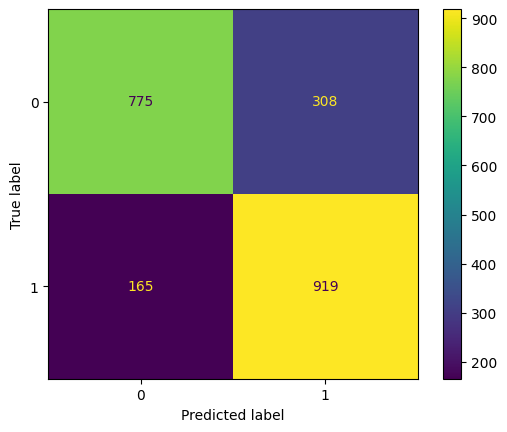

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

lr_cm_1 = confusion_matrix(y1_test, lry_pred_1)

disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm_1, display_labels=lrmodel_1.classes_)
disp.plot()

#### Group #2

In [33]:
#Train classification model- start with logistic regression
from sklearn.linear_model import LogisticRegression

lrmodel_2 = LogisticRegression().fit(X2_train, y2_train)

In [34]:
#Evaluate training model's performance
from sklearn.metrics import accuracy_score, classification_report

lry_pred_2 = lrmodel_2.predict(X2_test)
print('Accuracy:', accuracy_score(y2_test, lry_pred_2))
print('Classification report:\n', classification_report(y2_test, lry_pred_2))

Accuracy: 0.7720350715274573
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      1083
           1       0.75      0.83      0.78      1084

    accuracy                           0.77      2167
   macro avg       0.78      0.77      0.77      2167
weighted avg       0.78      0.77      0.77      2167



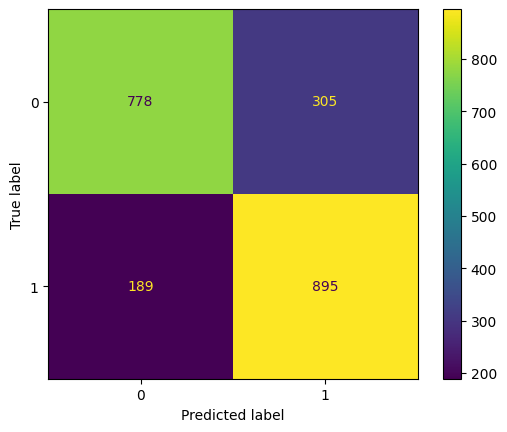

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

lr_cm_2 = confusion_matrix(y2_test, lry_pred_2)

disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm_2, display_labels=lrmodel_2.classes_)
disp.plot()

#### Group #3

In [36]:
#Train classification model- start with logistic regression
from sklearn.linear_model import LogisticRegression

lrmodel_3 = LogisticRegression().fit(X3_train, y3_train)

In [37]:
#Evaluate training model's performance
from sklearn.metrics import accuracy_score, classification_report

lry_pred_3 = lrmodel_3.predict(X3_test)
print('Accuracy:', accuracy_score(y3_test, lry_pred_3))
print('Classification report:\n', classification_report(y3_test, lry_pred_3))

Accuracy: 0.7826488232579604
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77      1083
           1       0.75      0.85      0.80      1084

    accuracy                           0.78      2167
   macro avg       0.79      0.78      0.78      2167
weighted avg       0.79      0.78      0.78      2167



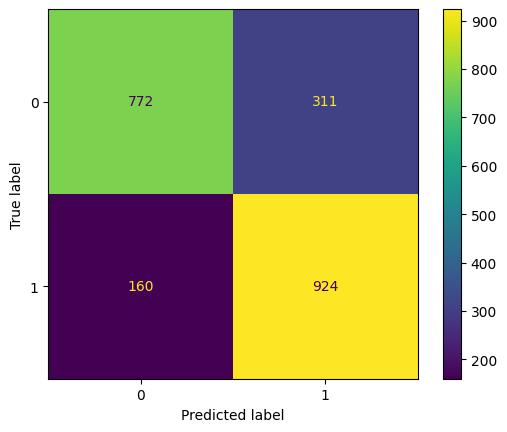

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

lr_cm_3 = confusion_matrix(y3_test, lry_pred_3)

disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm_3, display_labels=lrmodel_3.classes_)
disp.plot()

## SVM

#### Group #1

In [39]:
from sklearn.svm import SVC

svm_clf1 = SVC().fit(X1_train, y1_train)

In [40]:
svm_y1_pred = svm_clf1.predict(X1_test)


In [41]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy:', accuracy_score(y1_test, svm_y1_pred))
print('Classification report:\n', classification_report(y1_test, svm_y1_pred))

Accuracy: 0.78772496538994
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77      1083
           1       0.75      0.87      0.80      1084

    accuracy                           0.79      2167
   macro avg       0.79      0.79      0.79      2167
weighted avg       0.79      0.79      0.79      2167



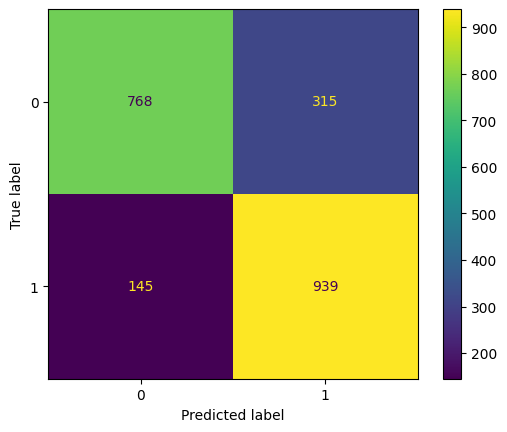

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
svm_cm1 = confusion_matrix(y1_test, svm_y1_pred)

disp1 = ConfusionMatrixDisplay(confusion_matrix=svm_cm1, display_labels=svm_clf1.classes_)
disp1.plot()

Tuned SVM Model Accuracy = 0.783


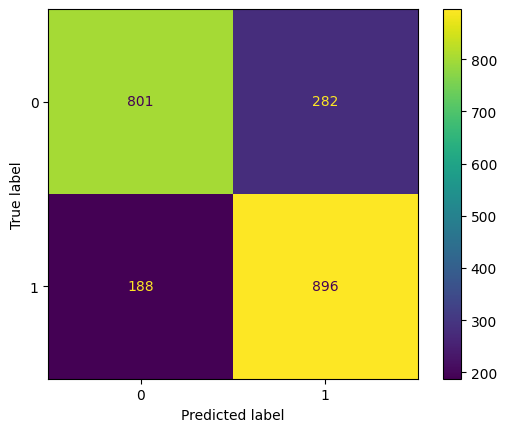

In [43]:
# SVM model tuning
from sklearn.model_selection import GridSearchCV
hyperparam_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_clf1a = GridSearchCV(SVC(), hyperparam_grid).fit(X1_train, y1_train);
svm_y1a_pred = svm_clf1a.predict(X1_test);
print("Tuned SVM Model Accuracy = %.3f" % (accuracy_score(svm_y1a_pred, y1_test)))
svm1a_cm = confusion_matrix(y1_test, svm_y1a_pred)
disp1a = ConfusionMatrixDisplay(confusion_matrix=svm1a_cm, display_labels=svm_clf1a.classes_)
disp1a.plot()

In [44]:
print('Best kernel: %s' % svm_clf1a.best_estimator_.kernel)

Best kernel: linear


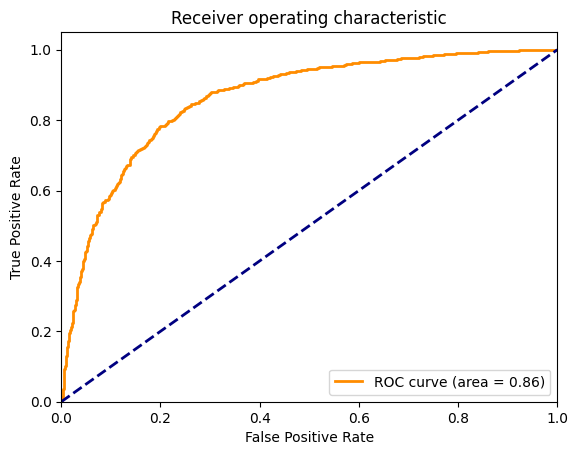

In [45]:
from sklearn.metrics import roc_curve, auc

svm_y1_score = svm_clf1.decision_function(X1_test)
fpr, tpr, _ = roc_curve(y1_test, svm_y1_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Group #2

In [46]:
from sklearn.svm import SVC

svm_clf2 = SVC().fit(X2_train, y2_train)

svm_y2_pred = svm_clf2.predict(X2_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy:', accuracy_score(y2_test, svm_y2_pred))
print('Classification report:\n', classification_report(y2_test, svm_y2_pred))

Accuracy: 0.7757268112598061
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76      1083
           1       0.74      0.84      0.79      1084

    accuracy                           0.78      2167
   macro avg       0.78      0.78      0.77      2167
weighted avg       0.78      0.78      0.77      2167



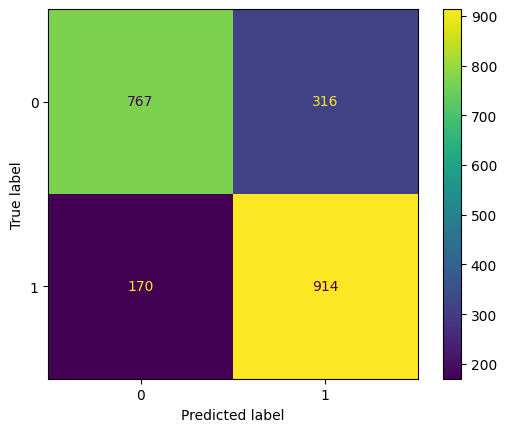

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
svm_cm2 = confusion_matrix(y2_test, svm_y2_pred)

disp2 = ConfusionMatrixDisplay(confusion_matrix=svm_cm2, display_labels=svm_clf2.classes_)
disp2.plot()

Tuned SVM Model Accuracy = 0.767


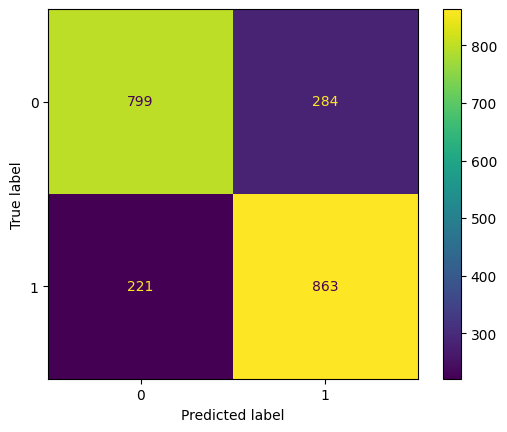

In [49]:
# SVM model tuning
from sklearn.model_selection import GridSearchCV
hyperparam_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_clf2a = GridSearchCV(SVC(), hyperparam_grid).fit(X2_train, y2_train);
svm_y2a_pred = svm_clf2a.predict(X2_test);
print("Tuned SVM Model Accuracy = %.3f" % (accuracy_score(svm_y2a_pred, y2_test)))
svm2a_cm = confusion_matrix(y2_test, svm_y2a_pred)
disp2a = ConfusionMatrixDisplay(confusion_matrix=svm2a_cm, display_labels=svm_clf2a.classes_)
disp2a.plot()

In [50]:
print('Best kernel: %s' % svm_clf2a.best_estimator_.kernel)

Best kernel: linear


#### Group #3

In [51]:
from sklearn.svm import SVC

svm_clf3 = SVC().fit(X3_train, y3_train)

svm_y3_pred = svm_clf3.predict(X3_test)

In [52]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy:', accuracy_score(y3_test, svm_y3_pred))
print('Classification report:\n', classification_report(y3_test, svm_y3_pred))

Accuracy: 0.7734194739270881
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76      1083
           1       0.74      0.85      0.79      1084

    accuracy                           0.77      2167
   macro avg       0.78      0.77      0.77      2167
weighted avg       0.78      0.77      0.77      2167



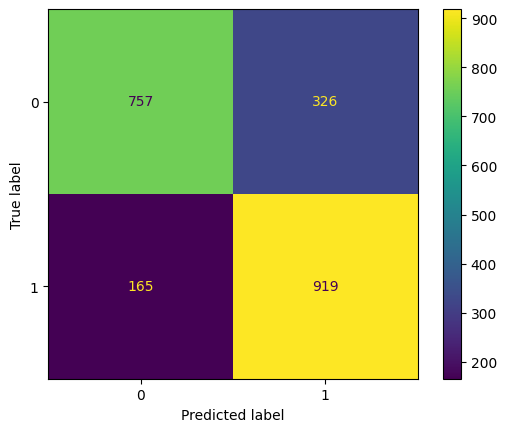

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
svm_cm3 = confusion_matrix(y3_test, svm_y3_pred)

disp3 = ConfusionMatrixDisplay(confusion_matrix=svm_cm3, display_labels=svm_clf3.classes_)
disp3.plot()

Tuned SVM Model Accuracy = 0.773


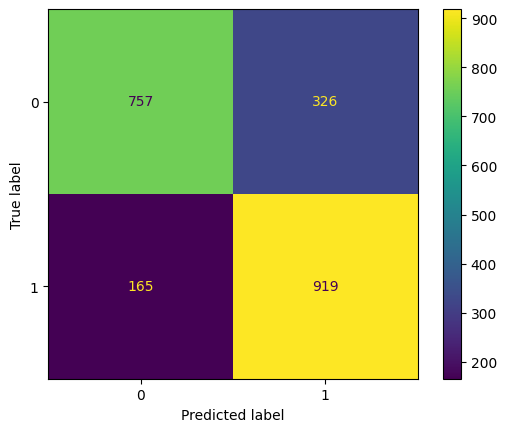

In [54]:
# SVM model tuning
from sklearn.model_selection import GridSearchCV
hyperparam_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_clf3a = GridSearchCV(SVC(), hyperparam_grid).fit(X3_train, y3_train);
svm_y3a_pred = svm_clf3a.predict(X3_test);
print("Tuned SVM Model Accuracy = %.3f" % (accuracy_score(svm_y3a_pred, y3_test)))
svm3a_cm = confusion_matrix(y3_test, svm_y3a_pred)
disp3a = ConfusionMatrixDisplay(confusion_matrix=svm3a_cm, display_labels=svm_clf3a.classes_)
disp3a.plot()

In [55]:
print('Best kernel: %s' % svm_clf3a.best_estimator_.kernel)

Best kernel: rbf


## Decision Tree

#### Group #1

In [56]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=10)
clf1_fit= clf1.fit(X1_train, y1_train)
print("Accuracy on training set: {:.3f}".format(clf1.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(clf1.score(X1_test, y1_test)))
#changed around max depth to see which would yield the highest accuracy for the decision tree

Accuracy on training set: 0.646
Accuracy on test set: 0.635


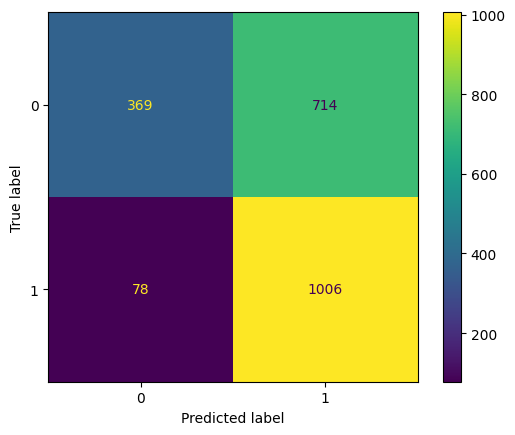

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Make predictions on test data
y1_pred = clf1.predict(X1_test)

cm1 = confusion_matrix(y1_test, y1_pred)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf1_fit.classes_)
disp1.plot()

#### Group #2

In [58]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=10)
clf2_fit= clf2.fit(X2_train, y2_train)
print("Accuracy on training set: {:.3f}".format(clf2.score(X2_train, y2_train)))
print("Accuracy on test set: {:.3f}".format(clf2.score(X2_test, y2_test)))
#changed around max depth to see which would yield the highest accuracy for the decision tree

Accuracy on training set: 0.642
Accuracy on test set: 0.636


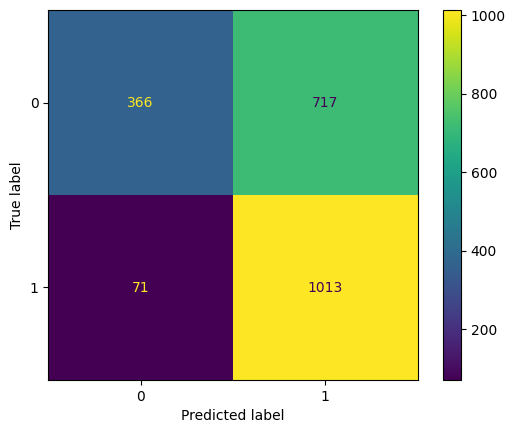

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Make predictions on test data
y2_pred = clf2.predict(X2_test)

cm2 = confusion_matrix(y2_test, y2_pred)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf2_fit.classes_)
disp2.plot()

#### Group #3

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=10)
clf3_fit= clf3.fit(X3_train, y3_train)
print("Accuracy on training set: {:.3f}".format(clf3.score(X3_train, y3_train)))
print("Accuracy on test set: {:.3f}".format(clf3.score(X3_test, y3_test)))
#changed around max depth to see which would yield the highest accuracy for the decision tree

Accuracy on training set: 0.643
Accuracy on test set: 0.625


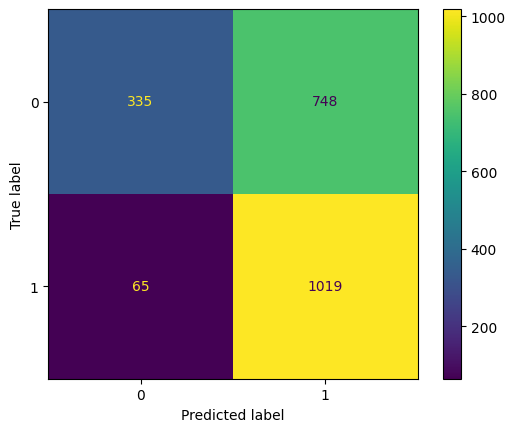

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Make predictions on test data
y3_pred = clf3.predict(X3_test)

cm3 = confusion_matrix(y3_test, y3_pred)

disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=clf3_fit.classes_)
disp3.plot()

## K-Fold Classification

#### Group #1

K-Fold with Random Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

kf1a = KFold(n_splits=8)

model1a = RandomForestClassifier()

scores1a = cross_val_score(model1a, X1, y1, cv=kf1a)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores1a.mean(), scores1a.std() * 2))

#### Group #2

K-fold with Random Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

kf2a = KFold(n_splits=8)

model2a = RandomForestClassifier()

scores2a = cross_val_score(model2a, X2, y2, cv=kf2a)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores2a.mean(), scores2a.std() * 2))

Accuracy: 0.66 (+/- 0.17)


#### Group #3

K-fold with Random Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

kf3a = KFold(n_splits=8)

model3a = RandomForestClassifier()

scores3a = cross_val_score(model3a, X3, y3, cv=kf3a)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores3a.mean(), scores3a.std() * 2))

Accuracy: 0.68 (+/- 0.13)


## CNN Model

https://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project07B%20-%20Text%20Classification%20Deep%20Learning%20CNN%20Models.ipynb

https://colab.research.google.com/github/pytorch/ignite/blob/master/examples/notebooks/TextCNN.ipynb


https://realpython.com/python-keras-text-classification/#convolutional-neural-networks-cnn

[link text](https://)

#### Group #1

In [ ]:
#CNN
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# select features and target
X1 = all_news_1[['title']]
y1 = all_news_1['label']

# split into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# tokenize data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X1_train['title'])

# convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(X1_train['title'])
test_sequences = tokenizer.texts_to_sequences(X1_test['title'])

# pad sequences to same length
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=100)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=100)

# build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(train_padded, y1_train, epochs=10, validation_data=(test_padded, y1_test))

KeyError: ignored

In [ ]:
# evaluate model
loss, accuracy = model.evaluate(test_padded, y1_test)

# print accuracy
print('Accuracy:', accuracy)

73/73 [==============================] - 0s 3ms/step - loss: 1.1395 - accuracy: 0.7532
Accuracy: 0.7532411217689514


In [ ]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(train_padded, y1_train, epochs=50, validation_data=(test_padded, y1_test))

# Plot the learning curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

model.fit(train_padded, y1_train, epochs=50, validation_data=(test_padded, y1_test), callbacks=[early_stop])

Epoch 1/50
290/290 [==============================] - 3s 10ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 1.1189 - val_accuracy: 0.7563
Epoch 2/50
290/290 [==============================] - 3s 9ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 1.1373 - val_accuracy: 0.7511
Epoch 3/50
290/290 [==============================] - 3s 9ms/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 1.1231 - val_accuracy: 0.7515
Epoch 4/50
290/290 [==============================] - 3s 9ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 1.1918 - val_accuracy: 0.7455
Epoch 5/50
290/290 [==============================] - 3s 11ms/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 1.1323 - val_accuracy: 0.7468
Epoch 6/50
290/290 [==============================] - 3s 9ms/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 1.1731 - val_accuracy: 0.7463


Epoch 1/50
290/290 [==============================] - 4s 10ms/step - loss: 0.6479 - accuracy: 0.6098 - val_loss: 0.5272 - val_accuracy: 0.7481
Epoch 2/50
290/290 [==============================] - 4s 12ms/step - loss: 0.4495 - accuracy: 0.8019 - val_loss: 0.4879 - val_accuracy: 0.7783
Epoch 3/50
290/290 [==============================] - 3s 10ms/step - loss: 0.3074 - accuracy: 0.8874 - val_loss: 0.5497 - val_accuracy: 0.7740
Epoch 4/50
290/290 [==============================] - 3s 9ms/step - loss: 0.2156 - accuracy: 0.9315 - val_loss: 0.6804 - val_accuracy: 0.7623
Epoch 5/50
290/290 [==============================] - 4s 14ms/step - loss: 0.1485 - accuracy: 0.9516 - val_loss: 0.7821 - val_accuracy: 0.7593
Epoch 6/50
290/290 [==============================] - 3s 10ms/step - loss: 0.1211 - accuracy: 0.9638 - val_loss: 0.8387 - val_accuracy: 0.7541
Epoch 7/50
290/290 [==============================] - 3s 10ms/step - loss: 0.0892 - accuracy: 0.9735 - val_loss: 1.0464 - val_accuracy: 0.7498


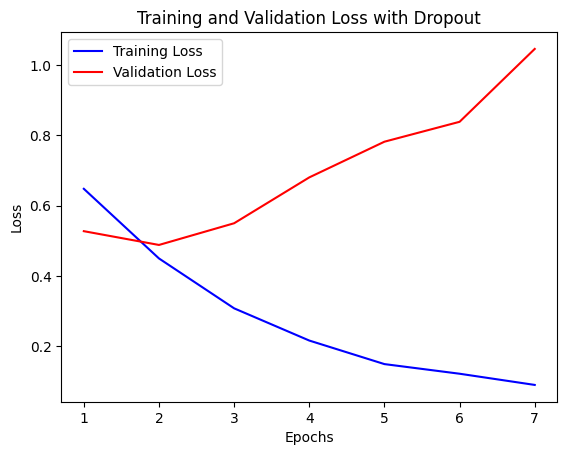

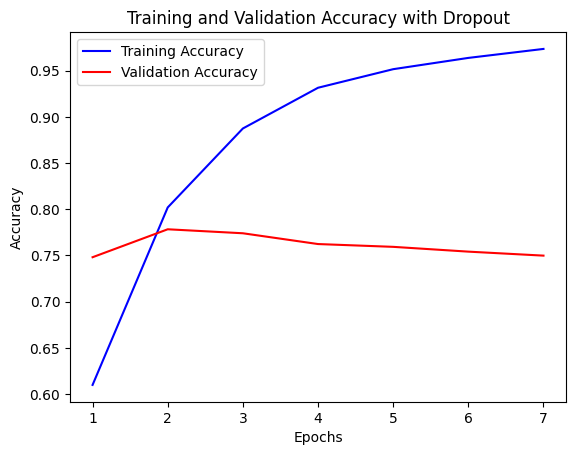

In [ ]:
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    Dropout(0.5), # Add a dropout layer with rate of 0.5
    tf.keras.layers.Dense(16, activation='relu'),
    Dropout(0.5), # Add a dropout layer with rate of 0.5
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model with dropout
history_dropout = model.fit(train_padded, y1_train, epochs=50, validation_data=(test_padded, y1_test), callbacks=[early_stop])

# plot learning curves
train_loss_dropout = history_dropout.history['loss']
val_loss_dropout = history_dropout.history['val_loss']
train_acc_dropout = history_dropout.history['accuracy']
val_acc_dropout = history_dropout.history['val_accuracy']
epochs = range(1, len(train_loss_dropout) + 1)

plt.plot(epochs, train_loss_dropout, 'b', label='Training Loss')
plt.plot(epochs, val_loss_dropout, 'r', label='Validation Loss')
plt.title('Training and Validation Loss with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc_dropout, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_dropout, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

model.fit(train_padded, y1_train, epochs=50, validation_data=(test_padded, y1_test), callbacks=[early_stop])

Epoch 1/50
290/290 [==============================] - 6s 19ms/step - loss: 0.0751 - accuracy: 0.9798 - val_loss: 1.1236 - val_accuracy: 0.7519
Epoch 2/50
290/290 [==============================] - 3s 10ms/step - loss: 0.0639 - accuracy: 0.9815 - val_loss: 1.2016 - val_accuracy: 0.7476
Epoch 3/50
290/290 [==============================] - 3s 10ms/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 1.3719 - val_accuracy: 0.7463
Epoch 4/50
290/290 [==============================] - 3s 9ms/step - loss: 0.0451 - accuracy: 0.9871 - val_loss: 1.4736 - val_accuracy: 0.7455
Epoch 5/50
290/290 [==============================] - 4s 12ms/step - loss: 0.0443 - accuracy: 0.9880 - val_loss: 1.5183 - val_accuracy: 0.7442
Epoch 6/50
290/290 [==============================] - 3s 9ms/step - loss: 0.0433 - accuracy: 0.9878 - val_loss: 1.5356 - val_accuracy: 0.7468


#### Group #2

In [ ]:
#CNN
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# select features and target
X2 = all_news_2[[['title']]
y2 = all_news_2['label']

# split into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# tokenize data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X2_train['title'])

# convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(X2_train['title'])
test_sequences = tokenizer.texts_to_sequences(X2_test['title'])

# pad sequences to same length
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=100)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=100)

# build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(train_padded, y2_train, epochs=10, validation_data=(test_padded, y2_test))

Epoch 1/10
290/290 [==============================] - 4s 10ms/step - loss: 0.5837 - accuracy: 0.6795 - val_loss: 0.4844 - val_accuracy: 0.7649
Epoch 2/10
290/290 [==============================] - 3s 11ms/step - loss: 0.3666 - accuracy: 0.8415 - val_loss: 0.4762 - val_accuracy: 0.7744
Epoch 3/10
290/290 [==============================] - 3s 9ms/step - loss: 0.2268 - accuracy: 0.9126 - val_loss: 0.5746 - val_accuracy: 0.7645
Epoch 4/10
290/290 [==============================] - 3s 9ms/step - loss: 0.1289 - accuracy: 0.9561 - val_loss: 0.7064 - val_accuracy: 0.7623
Epoch 5/10
290/290 [==============================] - 2s 8ms/step - loss: 0.0729 - accuracy: 0.9759 - val_loss: 0.8129 - val_accuracy: 0.7524
Epoch 6/10
290/290 [==============================] - 3s 12ms/step - loss: 0.0485 - accuracy: 0.9860 - val_loss: 0.8980 - val_accuracy: 0.7489
Epoch 7/10
290/290 [==============================] - 4s 14ms/step - loss: 0.0358 - accuracy: 0.9896 - val_loss: 0.9722 - val_accuracy: 0.7472
Ep

In [ ]:
# evaluate model
loss, accuracy = model.evaluate(test_padded, y2_test)

# print accuracy
print('Accuracy:', accuracy)

73/73 [==============================] - 0s 2ms/step - loss: 1.0637 - accuracy: 0.7407
Accuracy: 0.7407087087631226


Epoch 1/50
290/290 [==============================] - 5s 17ms/step - loss: 0.0084 - accuracy: 0.9950 - val_loss: 1.8701 - val_accuracy: 0.7239
Epoch 2/50
290/290 [==============================] - 4s 13ms/step - loss: 0.0083 - accuracy: 0.9942 - val_loss: 1.9065 - val_accuracy: 0.7213
Epoch 3/50
290/290 [==============================] - 5s 16ms/step - loss: 0.0086 - accuracy: 0.9935 - val_loss: 1.8642 - val_accuracy: 0.7252
Epoch 4/50
290/290 [==============================] - 3s 9ms/step - loss: 0.0088 - accuracy: 0.9945 - val_loss: 1.8678 - val_accuracy: 0.7195
Epoch 5/50
290/290 [==============================] - 3s 9ms/step - loss: 0.0084 - accuracy: 0.9936 - val_loss: 1.9247 - val_accuracy: 0.7191
Epoch 6/50
290/290 [==============================] - 4s 15ms/step - loss: 0.0085 - accuracy: 0.9945 - val_loss: 1.9798 - val_accuracy: 0.7226
Epoch 7/50
290/290 [==============================] - 6s 21ms/step - loss: 0.0082 - accuracy: 0.9938 - val_loss: 2.0131 - val_accuracy: 0.7247
E

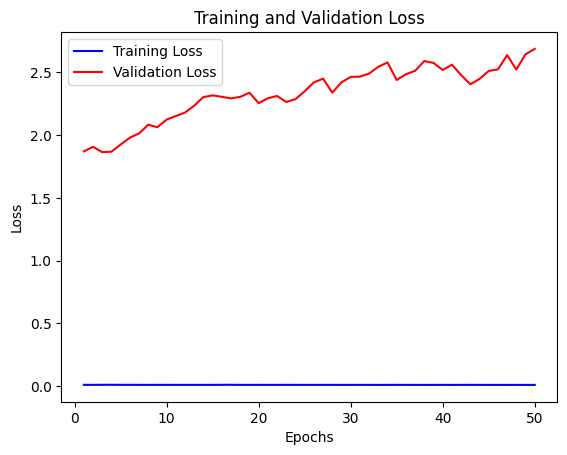

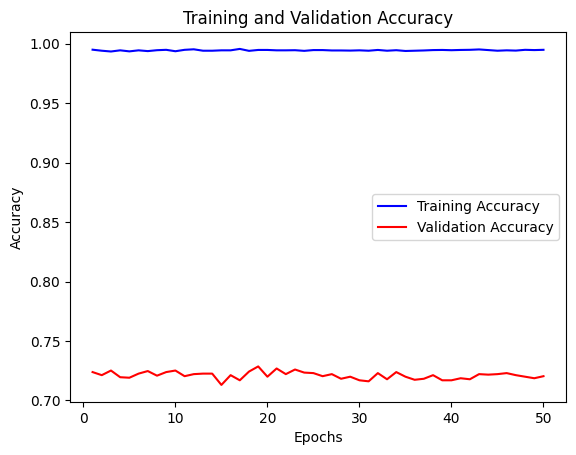

In [ ]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(train_padded, y2_train, epochs=50, validation_data=(test_padded, y2_test))

# Plot the learning curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Group #3

In [ ]:
#CNN
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# select features and target
X3 = all_news_3[['title']]
y3 = all_news_3['label']

# split into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# tokenize data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X3_train['title'])

# convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(X3_train['title'])
test_sequences = tokenizer.texts_to_sequences(X3_test['title'])

# pad sequences to same length
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=100)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=100)

# build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(train_padded, y3_train, epochs=10, validation_data=(test_padded, y3_test))

Epoch 1/10
290/290 [==============================] - 4s 10ms/step - loss: 0.5861 - accuracy: 0.6714 - val_loss: 0.5180 - val_accuracy: 0.7537
Epoch 2/10
290/290 [==============================] - 3s 11ms/step - loss: 0.3599 - accuracy: 0.8475 - val_loss: 0.4990 - val_accuracy: 0.7731
Epoch 3/10
290/290 [==============================] - 3s 10ms/step - loss: 0.2252 - accuracy: 0.9131 - val_loss: 0.5890 - val_accuracy: 0.7619
Epoch 4/10
290/290 [==============================] - 3s 9ms/step - loss: 0.1324 - accuracy: 0.9559 - val_loss: 0.7329 - val_accuracy: 0.7610
Epoch 5/10
290/290 [==============================] - 3s 9ms/step - loss: 0.0816 - accuracy: 0.9745 - val_loss: 0.8438 - val_accuracy: 0.7532
Epoch 6/10
290/290 [==============================] - 3s 10ms/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.9485 - val_accuracy: 0.7584
Epoch 7/10
290/290 [==============================] - 3s 10ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 1.0235 - val_accuracy: 0.7532
E

In [ ]:
# evaluate model
loss, accuracy = model.evaluate(test_padded, y3_test)

# print accuracy
print('Accuracy:', accuracy)

73/73 [==============================] - 0s 3ms/step - loss: 1.1688 - accuracy: 0.7468
Accuracy: 0.7467588782310486


In [ ]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(train_padded, y3_train, epochs=50, validation_data=(test_padded, y3_test))

# Plot the learning curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Multinomial Naive Bayes

#### Group #1

In [ ]:
#Multinomial naive bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# select features and target
X = all_news_1[['news_url', 'title']]
y = all_news_1['label']


# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create a pipeline for text classification
text_clf = Pipeline([
   ('vect', CountVectorizer()),
   ('clf', MultinomialNB()),
])


# train model
text_clf.fit(X_train['title'], y_train)


# evaluate model
predicted = text_clf.predict(X_test['title'])
accuracy = np.mean(predicted == y_test)
print('Accuracy:', accuracy)


#84%

Accuracy: 0.7856525496974935


Accuracy: 0.7856525496974935
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1191
           1       0.78      0.78      0.78      1123

    accuracy                           0.79      2314
   macro avg       0.79      0.79      0.79      2314
weighted avg       0.79      0.79      0.79      2314



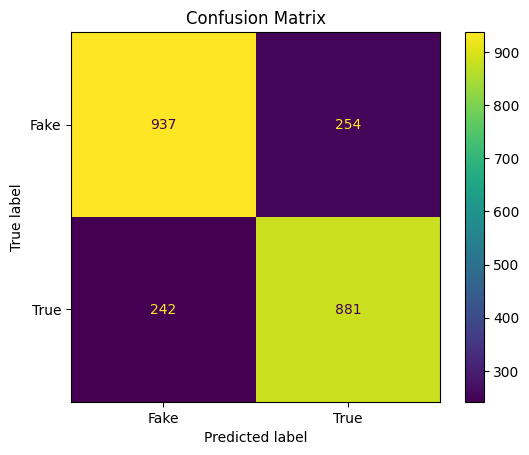

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# evaluate model
predicted = text_clf.predict(X_test['title'])
accuracy = np.mean(predicted == y_test)
print('Accuracy:', accuracy)

# calculate precision, recall, and f1-score
report = classification_report(y_test, predicted)
print(report)

# generate confusion matrix
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

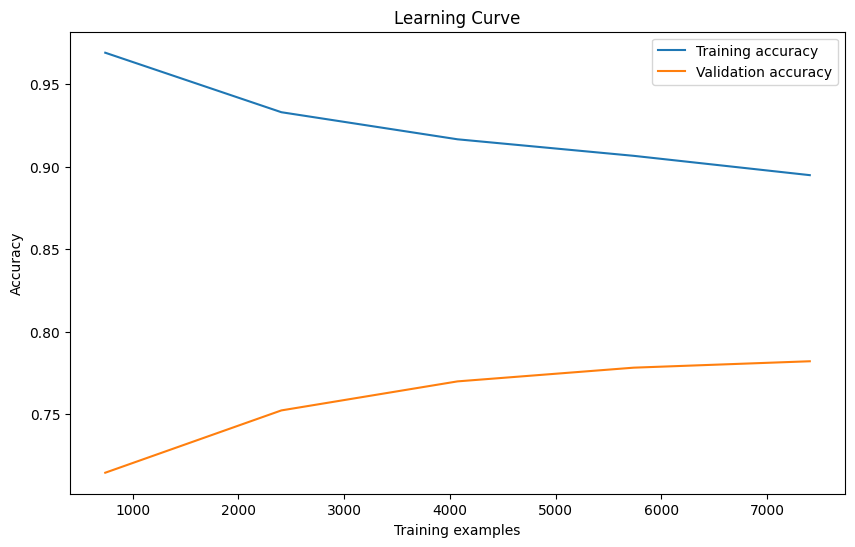

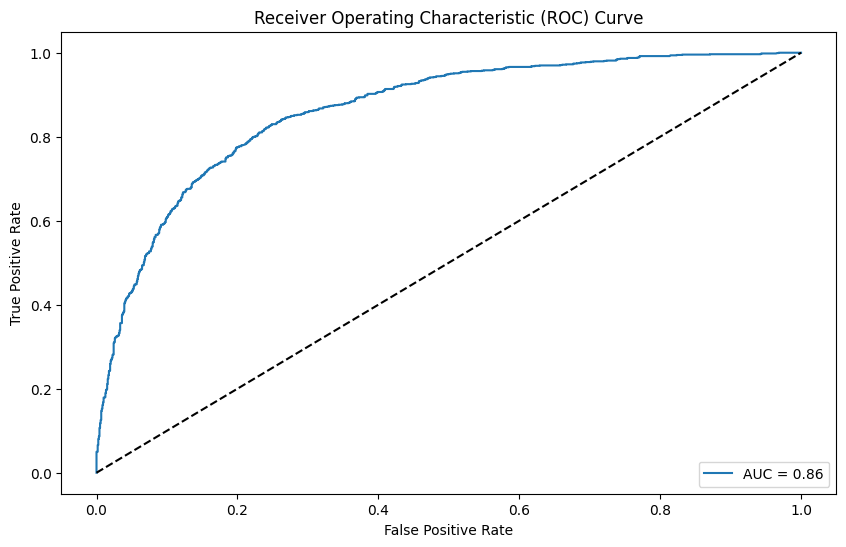

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# generate learning curve
train_sizes, train_scores, test_scores = learning_curve(text_clf, X_train['title'], y_train, cv=5, scoring='accuracy', n_jobs=-1)

# plot learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation accuracy')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# generate AUC-ROC curve
probs = text_clf.predict_proba(X_test['title'])
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Group #2

In [ ]:
#Multinomial naive bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# select features and target
X = all_news_2[['news_url', 'title']]
y = all_news_2['label']


# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create a pipeline for text classification
text_clf = Pipeline([
   ('vect', CountVectorizer()),
   ('clf', MultinomialNB()),
])


# train model
text_clf.fit(X_train['title'], y_train)


# evaluate model
predicted = text_clf.predict(X_test['title'])
accuracy = np.mean(predicted == y_test)
print('Accuracy:', accuracy)


#84%

Accuracy: 0.7869490060501296


Accuracy: 0.7869490060501296
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1191
           1       0.77      0.80      0.78      1123

    accuracy                           0.79      2314
   macro avg       0.79      0.79      0.79      2314
weighted avg       0.79      0.79      0.79      2314



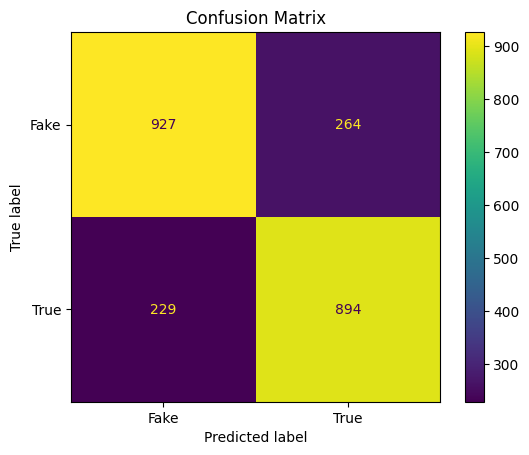

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# evaluate model
predicted = text_clf.predict(X_test['title'])
accuracy = np.mean(predicted == y_test)
print('Accuracy:', accuracy)

# calculate precision, recall, and f1-score
report = classification_report(y_test, predicted)
print(report)

# generate confusion matrix
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

#### Group #3

In [ ]:
#Multinomial naive bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# select features and target
X = all_news_3[['news_url', 'title']]
y = all_news_3['label']


# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# create a pipeline for text classification
text_clf = Pipeline([
   ('vect', CountVectorizer()),
   ('clf', MultinomialNB()),
])


# train model
text_clf.fit(X_train['title'], y_train)


# evaluate model
predicted = text_clf.predict(X_test['title'])
accuracy = np.mean(predicted == y_test)
print('Accuracy:', accuracy)


#84%

Accuracy: 0.7852203975799481


Accuracy: 0.7852203975799481
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1191
           1       0.78      0.79      0.78      1123

    accuracy                           0.79      2314
   macro avg       0.79      0.79      0.79      2314
weighted avg       0.79      0.79      0.79      2314



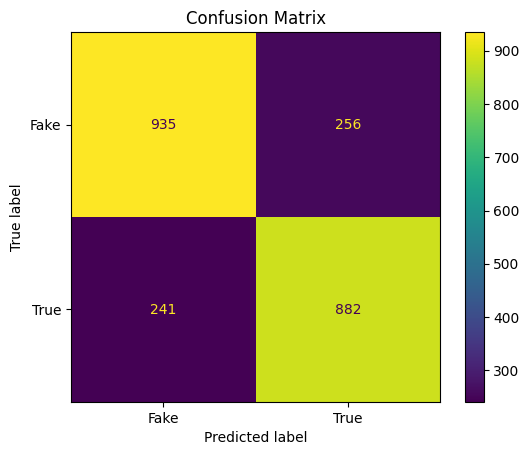

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# evaluate model
predicted = text_clf.predict(X_test['title'])
accuracy = np.mean(predicted == y_test)
print('Accuracy:', accuracy)

# calculate precision, recall, and f1-score
report = classification_report(y_test, predicted)
print(report)

# generate confusion matrix
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

## RNN Model

RNN: https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/text_classification_rnn.ipynb

#### Group #1

In [ ]:
#RNN

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split


# Select the features and target
X = all_news_1[['news_url', 'title']]
y = all_news_1['label']


# Split into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Tokenize data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train['title'])


# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(X_train['title'])
test_sequences = tokenizer.texts_to_sequences(X_test['title'])


# Pad sequences to the same length
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=100)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=100)


# Build model
model = tf.keras.Sequential([
   tf.keras.layers.Embedding(10000, 16, input_length=100),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train model
history = model.fit(train_padded, y1_train, epochs=10, validation_data=(test_padded, y1_test))


In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(test_padded, y1_test)

# Print accuracy
print('Accuracy:', accuracy)

73/73 [==============================] - 1s 11ms/step - loss: 1.0412 - accuracy: 0.7519
Accuracy: 0.7519446611404419


In [ ]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(train_padded, y1_train, epochs=50, validation_data=(test_padded, y1_test))

# Plot the learning curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# build model w/ dropout layers
model = tf.keras.Sequential([
   tf.keras.layers.Embedding(10000, 16, input_length=100),
   tf.keras.layers.SpatialDropout1D(0.2),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(train_padded, y1_train, epochs=50, validation_data=(test_padded, y1_test))

# plot learning curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#lab 5 code to try
train_set = {'data': np.random.rand(100, 10), 'label': np.random.randint(0, 10, size=(100,))}
validation_set = {'data': np.random.rand(50, 10), 'label': np.random.randint(0, 10, size=(50,))}

# there's 25 classes- returned previously
num_classes = 25

# convert labels
train_labels = keras.utils.to_categorical(train_set['label'], num_classes)
validation_labels = keras.utils.to_categorical(validation_set['label'], num_classes)

# define model architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# compile model- had to change code to make it work
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# train model with the keras model.fit method
epochs = 20
history = model.fit(train_set['data'],
                    train_labels,
                    validation_data=(validation_set['data'],
                                     validation_labels),
                    epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Group #2

In [ ]:
#RNN

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split


# Select the features and target
X = all_news_2[['news_url', 'title']]
y = all_news_2['label']


# Split into training and testing sets
X_train, X_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Tokenize data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train['title'])


# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(X_train['title'])
test_sequences = tokenizer.texts_to_sequences(X_test['title'])


# Pad sequences to the same length
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=100)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=100)


# Build model
model = tf.keras.Sequential([
   tf.keras.layers.Embedding(10000, 16, input_length=100),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train model
history = model.fit(train_padded, y2_train, epochs=10, validation_data=(test_padded, y2_test))


Epoch 1/10
290/290 [==============================] - 19s 56ms/step - loss: 0.5744 - accuracy: 0.7016 - val_loss: 0.4837 - val_accuracy: 0.7658
Epoch 2/10
290/290 [==============================] - 15s 51ms/step - loss: 0.3728 - accuracy: 0.8337 - val_loss: 0.4767 - val_accuracy: 0.7796
Epoch 3/10
290/290 [==============================] - 15s 53ms/step - loss: 0.2975 - accuracy: 0.8798 - val_loss: 0.4889 - val_accuracy: 0.7736
Epoch 4/10
290/290 [==============================] - 16s 56ms/step - loss: 0.1994 - accuracy: 0.9216 - val_loss: 0.5929 - val_accuracy: 0.7619
Epoch 5/10
290/290 [==============================] - 15s 50ms/step - loss: 0.1306 - accuracy: 0.9520 - val_loss: 0.7426 - val_accuracy: 0.7519
Epoch 6/10
290/290 [==============================] - 15s 50ms/step - loss: 0.0958 - accuracy: 0.9655 - val_loss: 0.8375 - val_accuracy: 0.7506
Epoch 7/10
290/290 [==============================] - 15s 51ms/step - loss: 0.0709 - accuracy: 0.9755 - val_loss: 0.9832 - val_accuracy:

In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(test_padded, y2_test)

# Print accuracy
print('Accuracy:', accuracy)

73/73 [==============================] - 1s 11ms/step - loss: 1.2118 - accuracy: 0.7468
Accuracy: 0.7467588782310486


In [ ]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(train_padded, y2_train, epochs=50, validation_data=(test_padded, y2_test))

# Plot the learning curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Group 3

In [ ]:
#RNN

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split


# Select the features and target
X = all_news_3[['news_url', 'title']]
y = all_news_3['label']


# Split into training and testing sets
X_train, X_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Tokenize data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train['title'])


# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(X_train['title'])
test_sequences = tokenizer.texts_to_sequences(X_test['title'])


# Pad sequences to the same length
train_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=100)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=100)


# Build model
model = tf.keras.Sequential([
   tf.keras.layers.Embedding(10000, 16, input_length=100),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train model
history = model.fit(train_padded, y3_train, epochs=10, validation_data=(test_padded, y3_test))


In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(test_padded, y3_test)

# Print accuracy
print('Accuracy:', accuracy)

73/73 [==============================] - 1s 10ms/step - loss: 1.1818 - accuracy: 0.7398
Accuracy: 0.7398444414138794


In [ ]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(train_padded, y3_train, epochs=50, validation_data=(test_padded, y3_test))

# Plot the learning curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Additional Code for Logistic Regression Model (using Topic Models)

Topic Models vs TF-IDF


*   TF-IDF: importance of terms in document by assigning higher weights to words that are more important (occuring more frequently)
*   Topic Modeling: determine topics/themes within the text. Analyze patterns of word occurences in text to return groups of words that often occur together

In [ ]:
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# set up NMF with 5 topics
nmf = NMF(n_components=5, random_state=42)

# fit NMF to TF-IDF matrix
W = nmf.fit_transform(X1)

# extract feature names from vectorizer
feature_names = vectorizer.get_feature_names_out()

# print top 10 words in each topic
for topic_idx, topic in enumerate(nmf.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()

# add topic features to dataset
for i in range(5):
    all_news_1[f"Topic {i}"] = W[:, i]

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(all_news_1.iloc[:, 2:], all_news_1['label'], test_size=0.2, random_state=42)

# train logistic regression model on topic features
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# predict labels for test set
y_pred = lr.predict(X_test)

# evaluate model performance
accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)

Topic 0:
tonya other insta tributes oxmans announce jelenanetwork authorities 23 front

Topic 1:
brewing portugal julie answered katrina antin drexler announce tributes zarins

Topic 2:
kims lacks julia zarins lax kimberley worrisome tributes hobbies jelenanetwork

Topic 3:
shockers kicking greys bitcoin announce tortorella woman zarins antin strain

Topic 4:
mime pussycats meant heights announce wives scheana kisses molester meat

Accuracy: 1.0


Confusion matrix:
TN: 1083 	FP: 0
FN: 0 	TP: 1084
AUC-ROC: 1.0


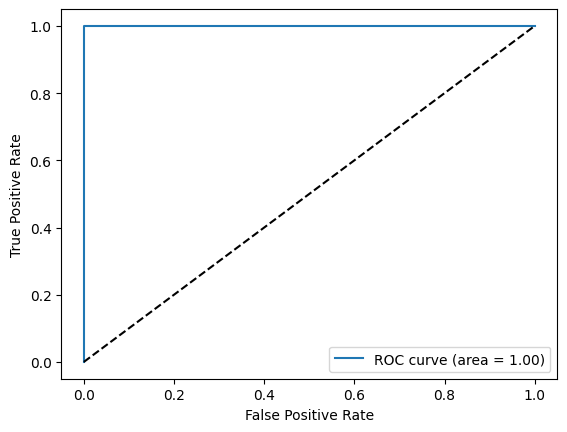

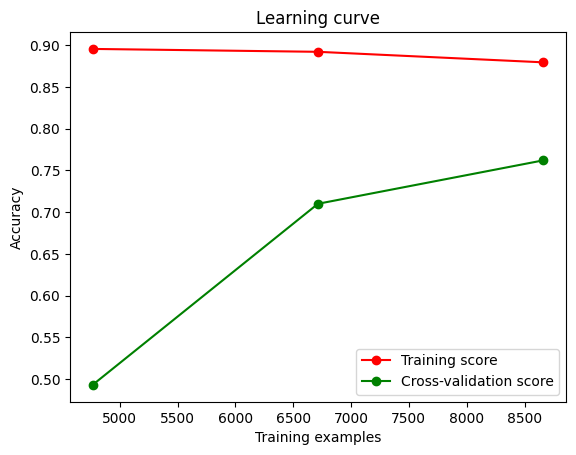

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
y = all_news_1['label']

# calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion matrix:")
print("TN:", tn, "\tFP:", fp)
print("FN:", fn, "\tTP:", tp)

# calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=5, scoring='accuracy')

# plot learning curve
plt.figure()
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# set up NMF with 5 topics
nmf = NMF(n_components=5, random_state=42)

# fit NMF to TF-IDF matrix
W = nmf.fit_transform(X1)

# extract feature names from vectorizer
feature_names = vectorizer.get_feature_names_out()

# print top 10 words in each topic
for topic_idx, topic in enumerate(nmf.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()

# add topic features to dataset
for i in range(5):
    all_news_1[f"Topic {i}"] = W[:, i]

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(all_news_1.iloc[:, 2:], all_news_1['label'], test_size=0.2, random_state=42)

# train logistic regression model on topic features with L2 regularization
lr = LogisticRegression(random_state=42, penalty='l2', C=0.1)
lr.fit(X_train, y_train)

# predict labels for test set
y_pred = lr.predict(X_test)

# evaluate model performance
accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)

Topic 0:
tonya other insta tributes oxmans announce jelenanetwork authorities 23 front

Topic 1:
brewing portugal julie answered katrina antin drexler announce tributes zarins

Topic 2:
kims lacks julia zarins lax kimberley worrisome tributes hobbies jelenanetwork

Topic 3:
shockers kicking greys bitcoin announce tortorella woman zarins antin strain

Topic 4:
mime pussycats meant heights announce wives scheana kisses molester meat

Accuracy: 1.0


Confusion matrix:
TN: 1083 	FP: 0
FN: 0 	TP: 1084
AUC-ROC: 1.0


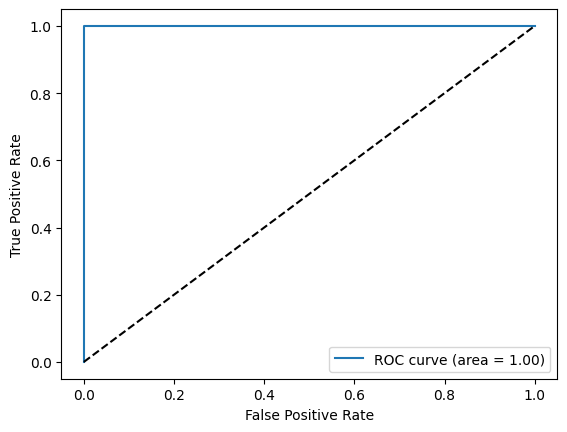

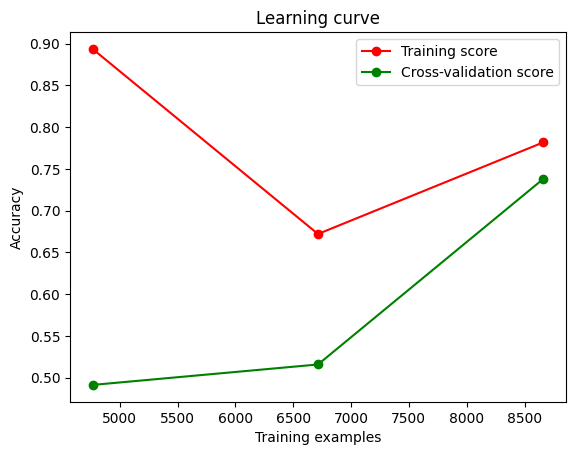

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
y = all_news_1['label']

# calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion matrix:")
print("TN:", tn, "\tFP:", fp)
print("FN:", fn, "\tTP:", tp)

# calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=5, scoring='accuracy')

# plot learning curve
plt.figure()
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Confusion matrix:
TN: 3486 	FP: 1837
FN: 603 	TP: 4905
AUC-ROC: 0.7727083663323179


KeyboardInterrupt: ignored

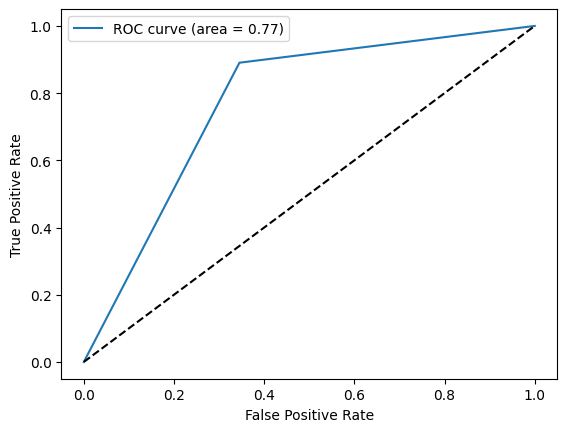

In [ ]:
#USE TOPIC MODELING AS A PRE-PROCESSING STEP FOR TF-IDF
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# define text data and labels
text_data = all_news_1['title']
y = all_news_1['label']

# create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# apply vectorizer to text data
X = vectorizer.fit_transform(text_data)

# create NMF model with 20 topics
nmf = NMF(n_components=20, random_state=42)

# fit NMF to text data
W = nmf.fit_transform(X)

# concatenate original features and NMF features
X_new = np.concatenate((X.toarray(), W), axis=1)

# train logistic regression model on new features
lr = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)
lr.fit(X_new, y)

# predict labels on test data
y_pred = lr.predict(X_new)

# calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
print("Confusion matrix:")
print("TN:", tn, "\tFP:", fp)
print("FN:", fn, "\tTP:", tp)

# calculate AUC-ROC score
auc_roc = roc_auc_score(y, y_pred)
print("AUC-ROC:", auc_roc)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X_new, y, cv=5, scoring='accuracy')

# plot learning curve
plt.figure()
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# predict labels for the input data
y_pred = lr.predict(X_new)

# calculate accuracy score
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

# Additional Code for SVM

Confusion matrix:
TN: 4385 	FP: 938
FN: 499 	TP: 5009
AUC-ROC: 0.8665940416146698


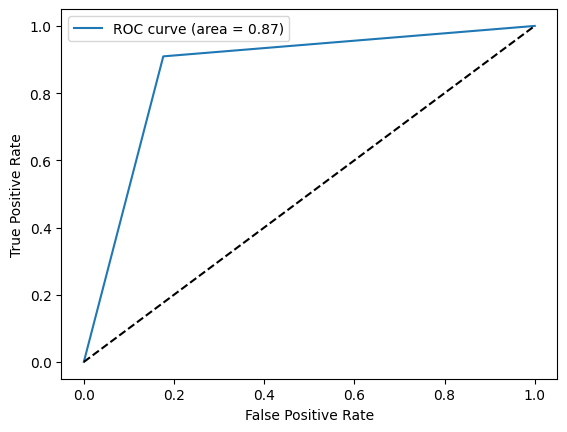

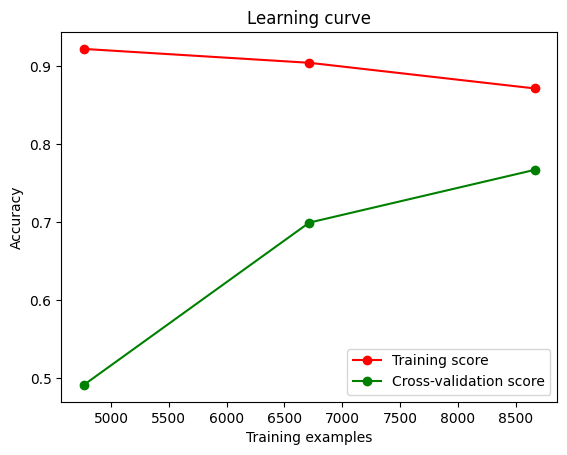

In [ ]:
#USE TOPIC MODELING AS A PRE-PROCESSING STEP FOR TF-IDF
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# define text data and labels
text_data = all_news_1['title']
y = all_news_1['label']

# create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# apply vectorizer to text data
X = vectorizer.fit_transform(text_data)

# create NMF model with 20 topics
nmf = NMF(n_components=20, random_state=42)

# fit NMF to text data
W = nmf.fit_transform(X)

# concatenate original features and NMF features
X_new = np.concatenate((X.toarray(), W), axis=1)

from sklearn.svm import LinearSVC

svm = LinearSVC(penalty='l2', C=0.1, max_iter=1000)
svm.fit(X_new, y)
y_pred = svm.predict(X_new)

# calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
print("Confusion matrix:")
print("TN:", tn, "\tFP:", fp)
print("FN:", fn, "\tTP:", tp)

# calculate AUC-ROC score
auc_roc = roc_auc_score(y, y_pred)
print("AUC-ROC:", auc_roc)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(svm, X_new, y, cv=5, scoring='accuracy')

# plot learning curve
plt.figure()
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# predict labels for the input data
y_pred = svm.predict(X_new)

# calculate accuracy score
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

# Additional Code for Decision Tree

Confusion matrix:
TN: 5323 	FP: 0
FN: 50 	TP: 5458
AUC-ROC: 0.9954611474219317


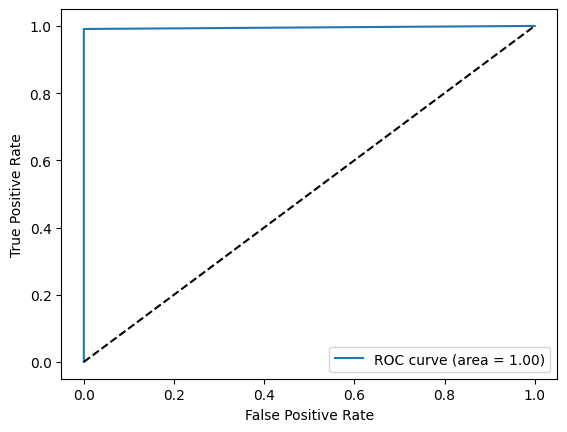

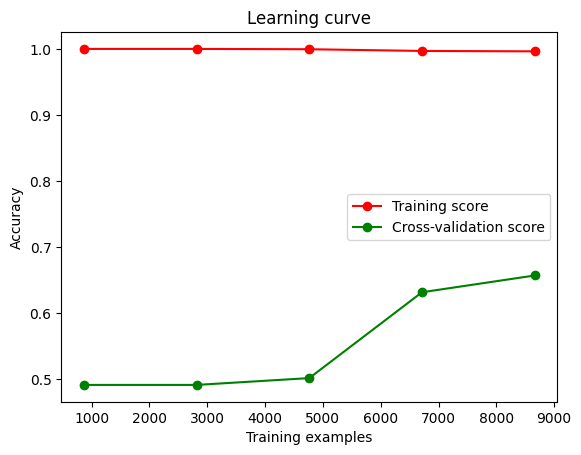

In [ ]:
#USE TOPIC MODELING AS A PRE-PROCESSING STEP FOR TF-IDF
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# define text data and labels
text_data = all_news_1['title']
y = all_news_1['label']

# create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# apply vectorizer to text data
X = vectorizer.fit_transform(text_data)

# create NMF model with 20 topics
nmf = NMF(n_components=20, random_state=42)

# fit NMF to text data
W = nmf.fit_transform(X)

# concatenate original features and NMF features
X_new = np.concatenate((X.toarray(), W), axis=1)

# train decision tree model on new features
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_new, y)

# predict labels on test data
y_pred = dt.predict(X_new)

# calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
print("Confusion matrix:")
print("TN:", tn, "\tFP:", fp)
print("FN:", fn, "\tTP:", tp)

# calculate AUC-ROC score
auc_roc = roc_auc_score(y, y_pred)
print("AUC-ROC:", auc_roc)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(dt, X_new, y, cv=5, scoring='accuracy')

# plot learning curve
plt.figure()
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

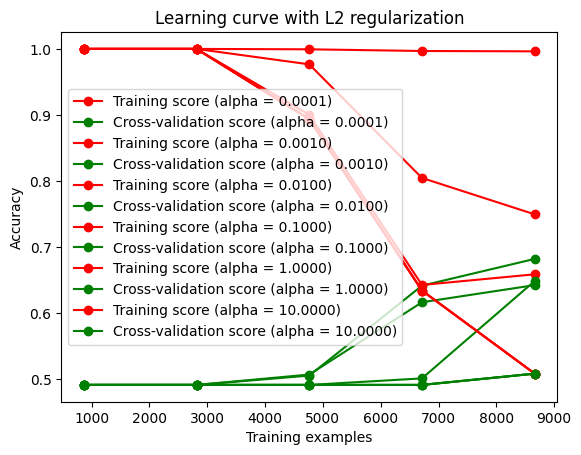

In [ ]:
#ADDING REGULARIZATION
#USE TOPIC MODELING AS A PRE-PROCESSING STEP FOR TF-IDF
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.tree import DecisionTreeClassifier

# define text data and labels
text_data = all_news_1['title']
y = all_news_1['label']

# create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# apply vectorizer to text data
X = vectorizer.fit_transform(text_data)

# create NMF model with 20 topics
nmf = NMF(n_components=20, random_state=42)

# fit NMF to text data
W = nmf.fit_transform(X)

# concatenate original features and NMF features
X_new = np.concatenate((X.toarray(), W), axis=1)

# range of alpha values for L2 regularization
alphas = np.logspace(-4, 1, 6)

# train decision tree model with L2 regularization for each alpha value
train_scores = []
test_scores = []
for alpha in alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, criterion='entropy')
    dt.fit(X_new, y)

    # calculate accuracy on training and test data
    train_sizes, train_score, test_score = learning_curve(dt, X_new, y, cv=5, scoring='accuracy')
    train_scores.append(np.mean(train_score, axis=1))
    test_scores.append(np.mean(test_score, axis=1))

# plot learning curve for each alpha value
plt.figure()
plt.title("Learning curve with L2 regularization")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
for i, alpha in enumerate(alphas):
    plt.plot(train_sizes, train_scores[i], 'o-', color="r",
             label="Training score (alpha = %0.4f)" % alpha)
    plt.plot(train_sizes, test_scores[i], 'o-', color="g",
             label="Cross-validation score (alpha = %0.4f)" % alpha)
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# predict labels for the input data
y_pred = dt.predict(X_new)

# calculate accuracy score
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.508540300987905


# Additional Code for K-Fold Classification w/ Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#USE TOPIC MODELING AS A PRE-PROCESSING STEP FOR TF-IDF
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# define text data and labels
text_data = all_news_1['title']
y = all_news_1['label']

# create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# apply vectorizer to text data
X = vectorizer.fit_transform(text_data)

# create NMF model with 20 topics
nmf = NMF(n_components=20, random_state=42)

# fit NMF to text data
W = nmf.fit_transform(X)

# concatenate original features and NMF features
X_new = np.concatenate((X.toarray(), W), axis=1)

# train decision tree model on new features with L2 regularization
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, random_state=42)
rf.fit(X_new, y)

# predict labels on test data using k-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []
conf_matrices = []
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    acc_scores.append(acc_score)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)
avg_acc_score = sum(acc_scores) / len(acc_scores)
avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)
print("Average accuracy score:", avg_acc_score)
print("Average confusion matrix:")
print(avg_conf_matrix)

Average accuracy score: 0.7026119996028738
Average confusion matrix:
[[548.2 516.4]
 [127.8 973.8]]


# Additional Code for CNN Model

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

# define text data and labels
text_data = all_news_1['title']
y = all_news_1['label']

# create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# apply vectorizer to text data
X = vectorizer.fit_transform(text_data)

# create NMF model with 20 topics
nmf = NMF(n_components=20, random_state=42)

# fit NMF to text data
W = nmf.fit_transform(X)

# concatenate original features and NMF features
X_new = np.concatenate((X.toarray(), W), axis=1)

# reshape data for CNN input
X_cnn = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)

# split data into training and testing sets
split = int(0.8 * len(X_cnn))
X_train = X_cnn[:split]
X_test = X_cnn[split:]
y_train = y[:split]
y_test = y[split:]

# define CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_new.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(X_train, y_train, epochs=10, batch_size=64)

# evaluate model on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy score:", acc_score)
print("Confusion matrix:")
print(conf_matrix)

Epoch 1/10
136/136 [==============================] - 203s 1s/step - loss: 0.6122 - accuracy: 0.6506
Epoch 2/10
136/136 [==============================] - 200s 1s/step - loss: 0.4581 - accuracy: 0.8130
Epoch 3/10
136/136 [==============================] - 201s 1s/step - loss: 0.3689 - accuracy: 0.8560
Epoch 4/10
136/136 [==============================] - 200s 1s/step - loss: 0.3119 - accuracy: 0.8831
Epoch 5/10
136/136 [==============================] - 199s 1s/step - loss: 0.2693 - accuracy: 0.9002
Epoch 6/10
136/136 [==============================] - 200s 1s/step - loss: 0.2351 - accuracy: 0.9167
Epoch 7/10
136/136 [==============================] - 202s 1s/step - loss: 0.2073 - accuracy: 0.9292
Epoch 8/10
136/136 [==============================] - 200s 1s/step - loss: 0.1824 - accuracy: 0.9406
Epoch 9/10
136/136 [==============================] - 201s 1s/step - loss: 0.1623 - accuracy: 0.9475
Epoch 10/10
68/68 [==============================] - 12s 172ms/step
Accuracy score: 0.64974